# **Step 1: Load and Transform the Data**
Upload the user_data.csv file here in google colab then run the code below

In [3]:
import pandas as pd
import ast

# Load data from CSV file, skipping the first row
df = pd.read_csv('user_data.csv', names=['Age', 'Gender', 'Total_Income', 'Expenses'], skiprows=1)

def is_valid_dict(s):
    try:
        ast.literal_eval(s)
        return True
    except (ValueError, SyntaxError):
        return False

# Convert 'Expenses' column from string to dictionary only if it's a valid dictionary
df['Expenses'] = df['Expenses'].apply(lambda x: ast.literal_eval(x) if is_valid_dict(x) else x)

# Expand the 'Expenses' dictionary into separate columns
expenses_df = pd.json_normalize(df['Expenses'])
df = pd.concat([df.drop('Expenses', axis=1), expenses_df], axis=1)

# Convert expenses columns to numeric values
expense_columns = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
df[expense_columns] = df[expense_columns].apply(pd.to_numeric)

df.head()  # To check the transformed data

,Age,Gender,Total_Income,utilities,entertainment,school_fees,shopping,healthcare
0,22,Male,50000,300,150,0,400,200
1,25,Female,55000,200,180,0,500,180
2,30,Male,60000,400,200,0,300,250
3,35,Female,45000,250,170,0,450,230
4,28,Female,52000,300,190,0,600,240


# **Step 2: Perform Visualizations**
Ages with the Highest Income

This visualization will show the age groups with the highest income levels.

**Insight**: The bar chart shows the total income distribution across different age groups. People between the ages of 25 to 35 appear to have relatively consistent incomes, ranging between 50,000 and 65,000. However, there are sharp increases at ages 50 and 60, where incomes reach 70,000, indicating that older individuals might have higher income levels due to career advancement, savings, or accumulated wealth.

**Actionable Insight**: Age groups around 50-60 might be key demographic segments for targeting premium services or higher-value products, given their higher earning power.

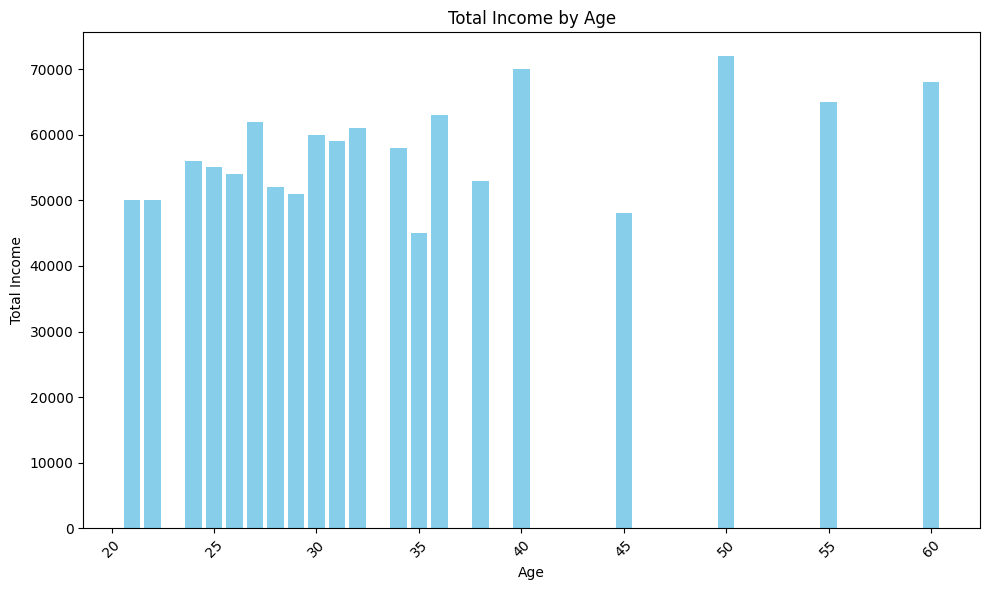

In [4]:
import matplotlib.pyplot as plt

# Plot income by age
plt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['Total_Income'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.title('Total Income by Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gender Distribution Across Spending Categories

This visualization will show the spending in different categories by gender.

**Insight** : This chart compares male and female spending habits across categories such as utilities, entertainment, school fees, shopping, and healthcare. The most noticeable difference is in the shopping category, where females significantly outspend males, while the healthcare expenses are similar across both genders.

**Actionable Insight**: Marketing efforts or product offers targeting shopping-related goods may be more effective when targeted toward females, given their higher spending in that category. Meanwhile, utilities and entertainment show smaller but notable differences, suggesting targeted offers could be segmented by gender.

<ipython-input-5-1b828cd70014>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Amount', hue='Gender', data=df_melted, ci=None)


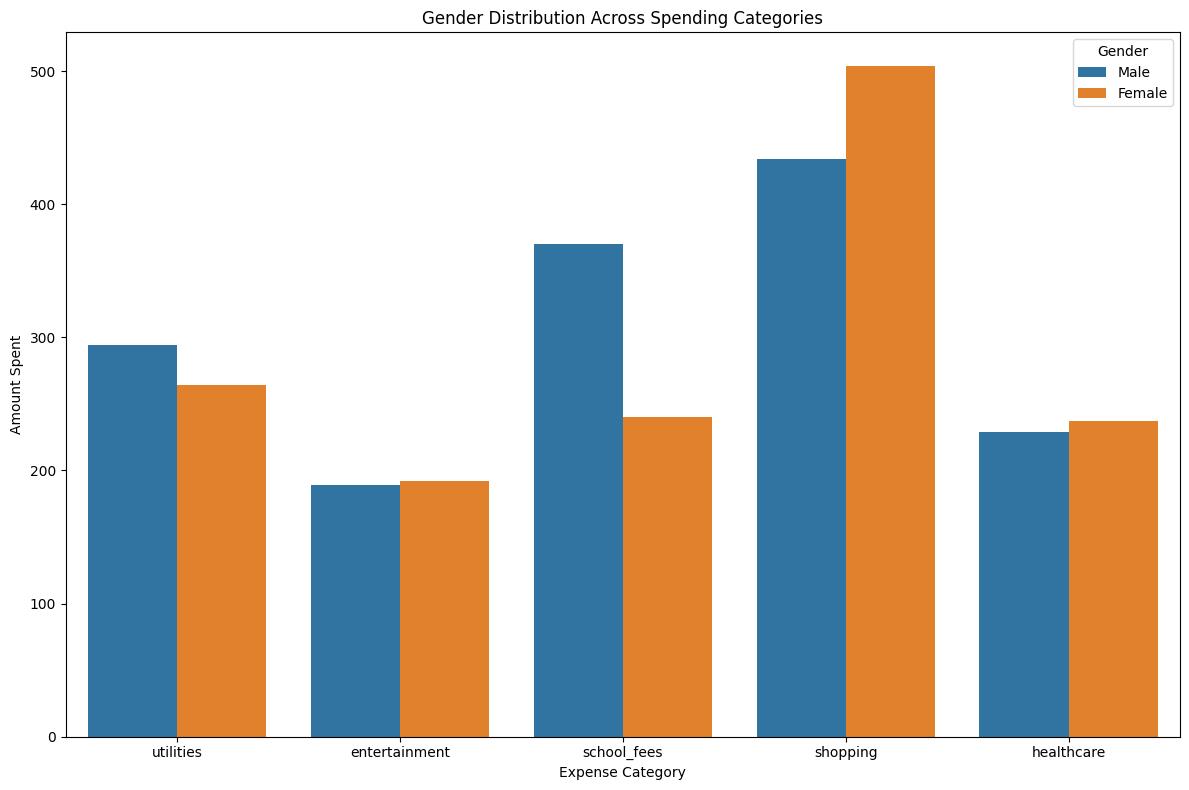

In [5]:
import seaborn as sns

# Melt the dataframe to create a long-form DataFrame for spending categories
df_melted = df.melt(id_vars=['Gender'], value_vars=expense_columns, var_name='Category', value_name='Amount')

# Plot spending categories by gender
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Amount', hue='Gender', data=df_melted, ci=None)
plt.title('Gender Distribution Across Spending Categories')
plt.ylabel('Amount Spent')
plt.xlabel('Expense Category')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# **Step 3: Export Charts for Use in a PowerPoint Presentation**

You can export the charts as image files using the following code:

<ipython-input-6-9cfd3674594c>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Amount', hue='Gender', data=df_melted, ci=None)


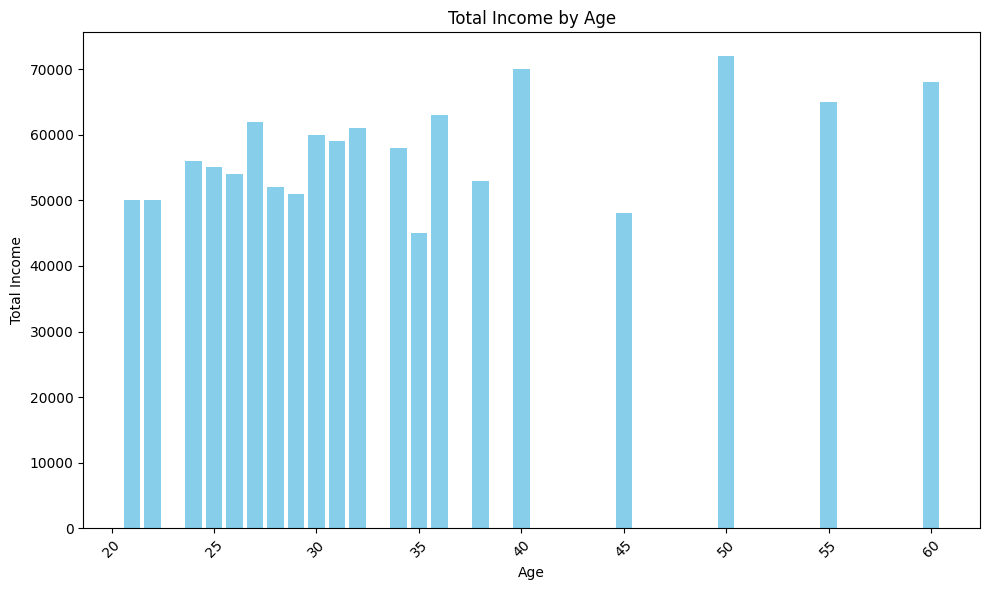

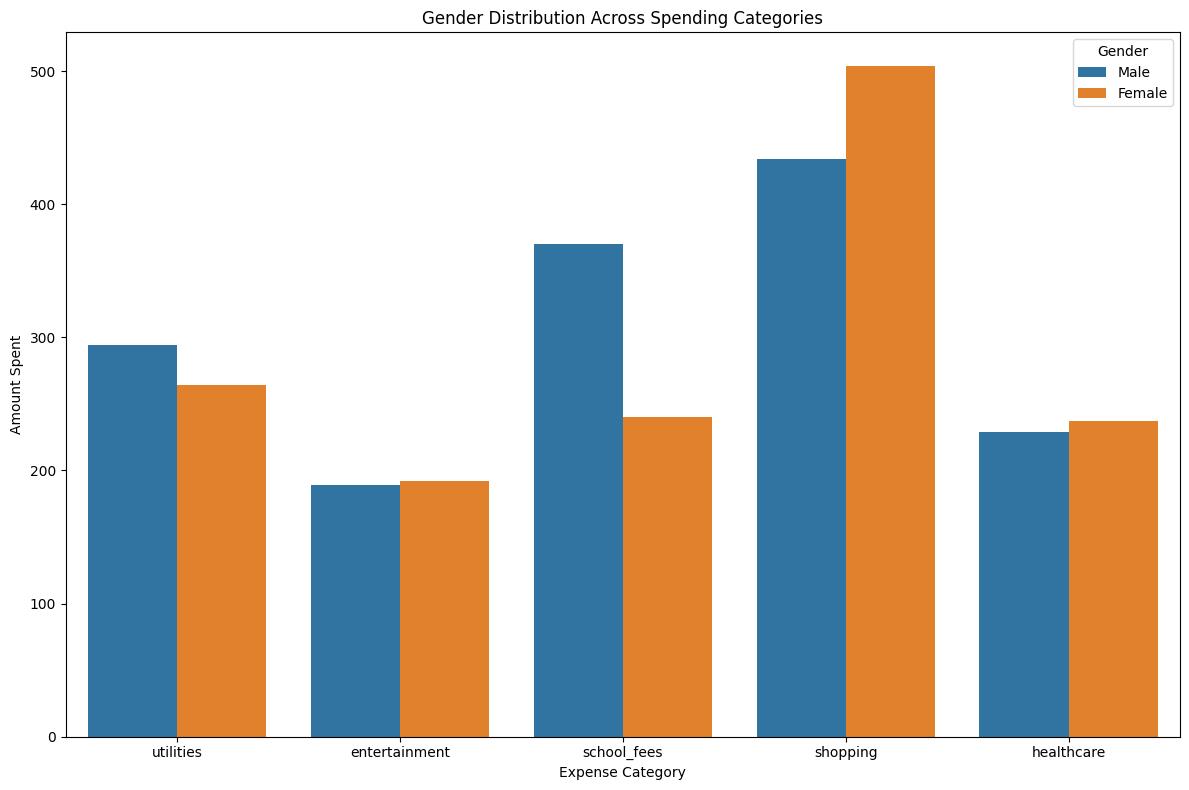

In [6]:
# Save the charts as images
plt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['Total_Income'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.title('Total Income by Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('income_by_age.png')

# Save the gender distribution chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Amount', hue='Gender', data=df_melted, ci=None)
plt.title('Gender Distribution Across Spending Categories')
plt.ylabel('Amount Spent')
plt.xlabel('Expense Category')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('gender_distribution_expenses.png')